In [176]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import(
accuracy_score,
confusion_matrix,
precision_score,
recall_score,
classification_report,
roc_curve,
roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

In [137]:
b_cancer = pd.read_csv('data.csv')

In [138]:
b_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [139]:
b_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [140]:
b_cancer['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [141]:
# as diagnosis is category encode it to 0 and 1
# creating mapping

mapping = {
    'B': 0,
    'M': 1
}

b_cancer['diagnosis'] = b_cancer['diagnosis'].map(mapping)

In [142]:
# drop column with NaN
b_cancer = b_cancer.drop('Unnamed: 32', axis=1)

In [143]:
# define target feature
y = b_cancer['diagnosis']

In [145]:
# make for y df
y_copy = y.copy().reset_index()
y_copy

,index,diagnosis
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
564,564,1
565,565,1
566,566,1
567,567,1


C:\Users\User\AppData\Local\Temp\ipykernel_8420\1318521009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=y_copy, palette = 'Set2')


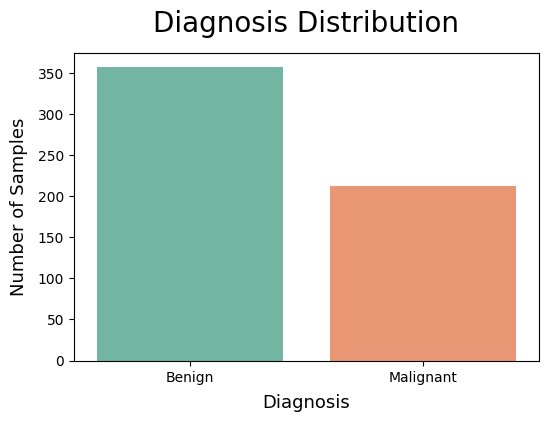

In [146]:
# plot countplot

plt.figure(figsize=(6, 4)) 
sns.countplot(x='diagnosis', data=y_copy, palette = 'Set2')

plt.title('Diagnosis Distribution', pad = 15, fontsize = 20)
plt.xlabel('Diagnosis', labelpad = 7, fontsize = 13)
plt.ylabel('Number of Samples', labelpad = 7, fontsize = 13)

new_labels = ['Benign', 'Malignant']
plt.xticks(ticks=[0, 1],labels = new_labels)

plt.show()

---
Malignant cases is less common than Benign cases
***

In [147]:
# drop target feature
b_cancer = b_cancer.drop('diagnosis', axis=1)

In [148]:
# drop column with id
b_cancer = b_cancer.drop('id', axis=1)

In [149]:
# Select numeric columns only
numeric_cols = [cname for cname in b_cancer.columns if b_cancer[cname].dtype in ['int64', 'float64']]
X = b_cancer[numeric_cols].copy()

In [150]:
# check shape of X and y
print("Shape of input data: {} and shape of target variable: {}".format(X.shape, y.shape))

Shape of input data: (569, 30) and shape of target variable: (569,)


In [151]:
# Check first 5 training examples
pd.concat([X,y], axis=1).head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [152]:
# Standard Scaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [153]:
# train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42, stratify = y)

In [154]:
y_train.mean(), y_test.mean() # these values are the same, so we can make logicregression

(np.float64(0.37362637362637363), np.float64(0.3684210526315789))

In [155]:
# logistic Regression
lg_model = LogisticRegression(max_iter = 5000)
lg_model.fit(X_train, y_train)

y_predict_lg = lg_model.predict(X_test)

In [156]:
# classification report
print(classification_report(y_test, y_predict_lg))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [157]:
# confusion matrix
confusion_matrix_logistic = confusion_matrix(y_test, y_predict_lg)

<Axes: >

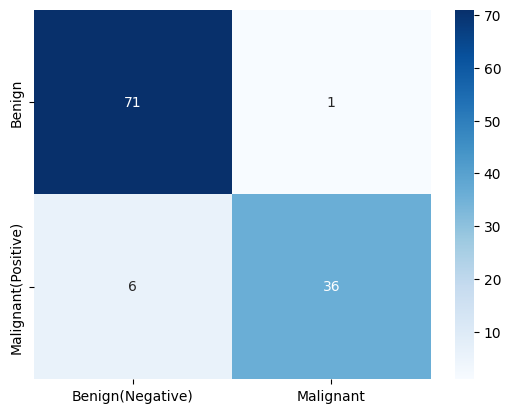

In [158]:
# heatmap of confusion matrix
sns.heatmap(
  confusion_matrix_logistic,
  annot = True,
  fmt='d',
  cmap = 'Blues',
  xticklabels = ['Benign(Negative)', 'Malignant'],
  yticklabels = ['Benign', 'Malignant(Positive)'],
)

---
### We will use recall value, because it is more reliable for breast cancer determination
- The recall rate is 86%.

- This means that out of 42 truly sick patients (with cancer), the model was able to correctly detect 36. The remaining 6 patients were misclassified as healthy.
***

In [160]:
# KNN

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)

print("\nTraining the K-Nearest Neighbors model (K=5)...")
knn_model.fit(X_train_scaled, y_train)

# Prediction on the test set
y_pred_knn = knn_model.predict(X_test_scaled)


Training the K-Nearest Neighbors model (K=5)...


In [162]:
# classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



---
The recall lebel is 0.9. That is higher than in LogisticRegression
***

In [168]:
# Random Forest
# Initializing the Random Forest model
# n_estimators: number of trees in the forest (100 is the default initial value)
rf_model = RandomForestClassifier(
n_estimators=100,
random_state=42,
class_weight='balanced' # Add class weighting, as discussed earlier, to improve recall
)

# Training the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

print("\n--- Classification Report (Random Forest) ---")
# 'target_names' allows you to display the labels 'B' and 'M' instead of 0 and 1
print(classification_report(y_test, y_pred_rf))


--- Classification Report (Random Forest) ---
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



---
The recall lebel is 0.93. That is higher than in LogisticRegression and in KNN
***

In [174]:
# SVM

# Create a pipeline: scaling (required for SVM) and the SVC model
# enable class_weight='balanced' right away, as this is a key factor for Recall
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(class_weight='balanced', random_state=42)) 
])

In [177]:
# Set the parameter grid for the search
param_grid = {
# 'svc__' specifies that the parameter applies to the 'svc' step in the pipeline
'svc__C': np.logspace(-2, 2, 5), # For example, 5 C values from 0.01 to 100
'svc__kernel': ['linear', 'rbf'] # Try linear and radial kernels
}

In [178]:
# Initialize Grid Search by specifying that we want to maximize Recall
grid_search_svc = GridSearchCV(
pipeline, # Pipeline
param_grid, # Grid parameters
cv=5, # 5-fold cross-validation
scoring='recall' # Focus on Recall for our problem
)

# Train Grid Search on training data
grid_search_svc.fit(X_train, y_train)

# Analyze results
best_svc_model = grid_search_svc.best_estimator_

print(f"Best Recall (based on CV): {grid_search_svc.best_score_:.4f}")
print(f"Best parameters: {grid_search_svc.best_params_}")

# Final score on the test set
svc_y_pred_tuned = best_svc_model.predict(X_test)
print("\n--- Final SVM report with tuned parameters ---")
print(classification_report(y_test, svc_y_pred_tuned))

Best Recall (based on CV): 0.9588
Best parameters: {'svc__C': np.float64(1.0), 'svc__kernel': 'rbf'}

--- Final SVM report with tuned parameters ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



---
- The recall lebel is 0.98. That is higher than in all other models
- SVM with grid is the best model for breast cancer prediction
---